# The Sparks Foundation Internship Project

## Task3 : Exploratory Data Analysis- Retail
   
                                         





## Questions for which data should be analyzed

* Perform exploratory Data Analysis on dataset "SampleSuperstore".
* Find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data.

In [25]:
#First of all let's install python libraries which we need to use for analysis.

!pip install pandas  --upgrade --quiet
!pip install numpy  --upgrade --quiet
!pip install matplotlib  --upgrade --quiet
!pip install matplotlib seaborn --upgrade --quiet

In [26]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importng dataset by using python library pandas function

df = pd.read_csv("SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
# first we get familiar with dataset before cleaning it.

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Finding reletion between different columns

df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [7]:
# Checking for any duplicate values to clean the data.

df.duplicated().sum()

17

In [8]:
# There are 17 duplicate values so we will remove them and also rename the subcategory column because hyphen in name of column can sometime cause problems.

df.drop_duplicates(inplace = True)
df.rename({"Sub-Category":"Subcategory"}, axis=1, inplace = True)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Subcategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
# Now we will check for unique values of different columns

df["City"].nunique()

531

In [10]:
# Number of unique states.

df["State"].nunique()


49

In [11]:
# Unique Regions

df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
# Different type of Category.

df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
# Different subcategory

df["Subcategory"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [14]:
# we will make a subset of data to analyze it by each region.

df2 = df.groupby(["Region", "Category"]).sum()
df2 = df2.reset_index()
df2

,Region,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Central,Furniture,31450757,163407.1938,1824,143.04,-2906.1467
1,Central,Office Supplies,92607360,166959.3470,5400,358.20,8864.5899
2,Central,Technology,27465071,170416.3120,1544,55.90,33697.4320
3,East,Furniture,10364437,208009.8320,2212,92.30,3058.2246
4,East,Office Supplies,29762320,205451.3830,6455,244.50,40986.0495
5,East,Technology,9972581,264973.9810,1942,76.70,47462.0351
6,South,Furniture,11471303,117298.6840,1291,40.35,6771.2061
7,South,Office Supplies,34072173,125651.3130,3800,166.60,19986.3928
8,South,Technology,10331576,148771.9080,1118,31.60,19991.8314
9,West,Furniture,64719968,252590.6035,2693,92.90,11498.5297


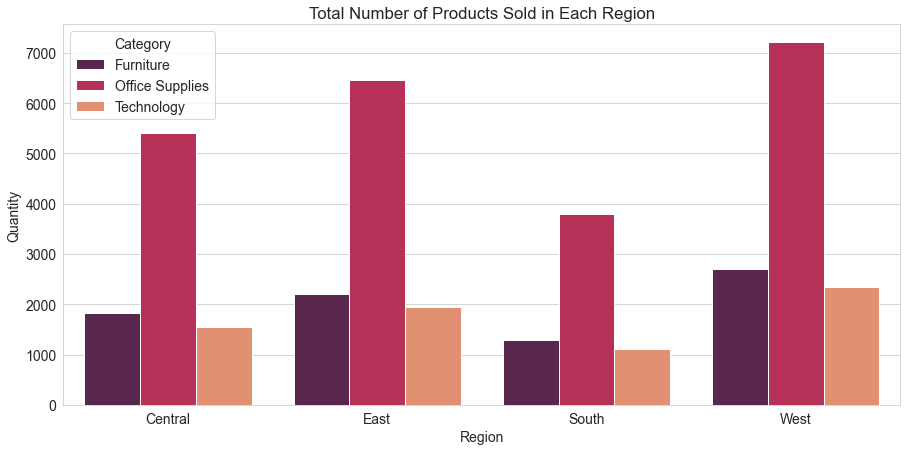

In [39]:
# let's plot the graph for each region v/s Quantity

plt.rcParams['font.size']= 14
plt.figure(figsize=(15,7))
plt.title("Total Number of Products Sold in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Quantity', hue= "Category", palette= 'rocket', data = df2);


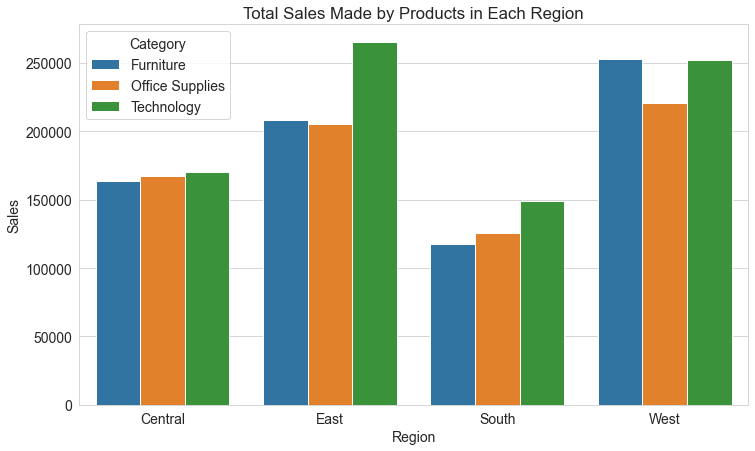

In [40]:
# let's plot the graph for each region v/s sales

plt.rcParams['font.size']= 14
plt.figure(figsize=(12,7))
plt.title("Total Sales Made by Products in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Sales', hue= "Category", data = df2);


                                                                                                                                                     
#### From both graphs we can conclude that maximum items sold in each region were belong to Office Supplies. But the maximum sales obtained by items which belong to Technology. The reason is obvious that technical products cost way much higher than office supplies. For example: A mobile phone will always cost way more than a binder.










In [17]:
# Now we will make another subset to analyze subcategory items by different parameters.

df3 = df[["Subcategory", "Sales", "Profit","Quantity"]]
df3 = df3.groupby(["Subcategory"]).sum()
df3 = df3.reset_index()
df3 = df3.sort_values("Quantity", ascending= False)
df3


,Subcategory,Sales,Profit,Quantity
3,Binders,203409.1690,30228.0003,5971
12,Paper,78224.1420,33944.2395,5144
9,Furnishings,91683.0240,13052.7230,3560
13,Phones,330007.0540,44515.7306,3289
14,Storage,223843.6080,21278.8264,3158
2,Art,27107.0320,6524.6118,2996
0,Accessories,167380.3180,41936.6357,2976
5,Chairs,327777.7610,26567.1278,2351
1,Appliances,107532.1610,18138.0054,1729
10,Labels,12444.9120,5526.3820,1396


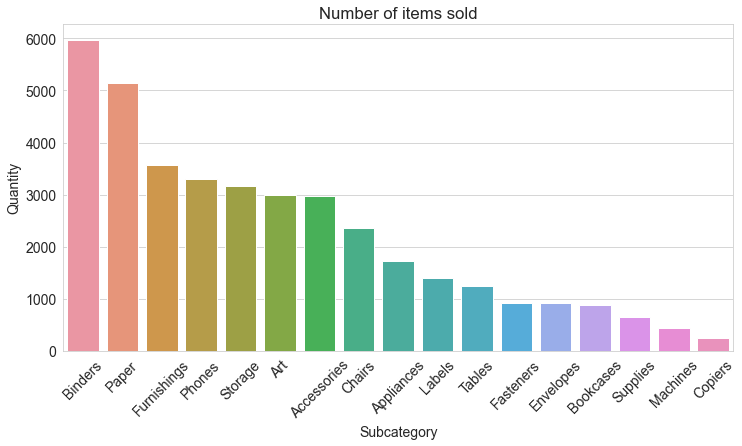

In [30]:
# let's plot the graph to know which product sold the most overall.

plt.rcParams['font.size']= 14
plt.figure(figsize=(12,6))
plt.title("Number of items sold")
plt.xticks(rotation = 45)
sns.barplot(x= "Subcategory", y= "Quantity", data = df3);

In [29]:


df4= df3[["Subcategory", "Sales", "Profit"]]
df4.set_index("Subcategory", inplace= True)
df4

,Sales,Profit
Subcategory,,
Binders,203409.1690,30228.0003
Paper,78224.1420,33944.2395
Furnishings,91683.0240,13052.7230
Phones,330007.0540,44515.7306
Storage,223843.6080,21278.8264
Art,27107.0320,6524.6118
Accessories,167380.3180,41936.6357
Chairs,327777.7610,26567.1278
Appliances,107532.1610,18138.0054


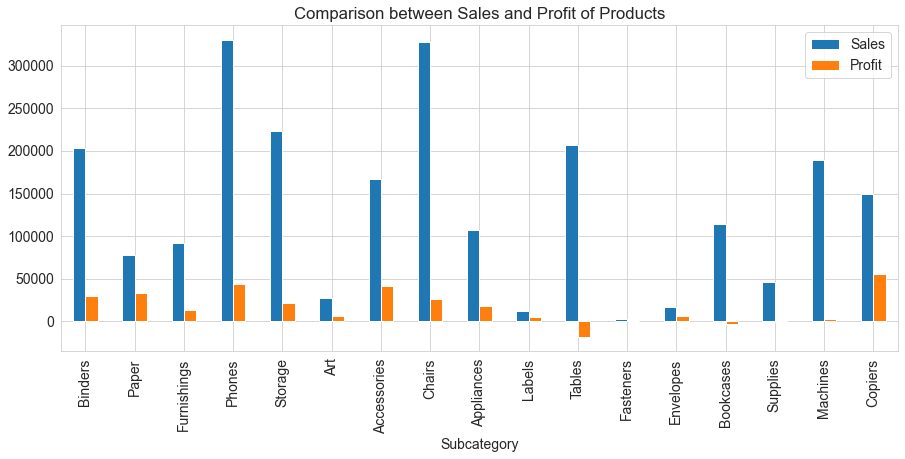

In [20]:
# let's plot the graph to find the relationship between sales and profit.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
df4.plot(kind='bar');
plt.title("Comparison between Sales and Profit of Products");

In [21]:
# let's make another subset to analyze data by state

df5 = df[["State", "Sales", "Profit", "Quantity", "Discount"]]
df5 = df5.groupby(["State"]).sum()
df5= df5.reset_index()
df5 = df5.sort_values("Quantity", ascending= False)
df5.head(15)



,State,Sales,Profit,Quantity,Discount
3,California,457576.2715,76330.7891,7649,145.60
30,New York,310827.1510,74015.4622,4220,62.40
41,Texas,170124.5418,-25750.9833,3718,364.24
36,Pennsylvania,116496.3620,-15565.4035,2150,192.70
45,Washington,138560.8100,33368.2375,1871,32.40
11,Illinois,80162.5370,-12601.6500,1842,191.10
33,Ohio,77976.7640,-16959.3178,1757,152.10
8,Florida,89473.7080,-3399.3017,1379,114.65
31,North Carolina,55603.1640,-7490.9122,983,70.60
20,Michigan,75879.6440,24428.0903,943,1.80


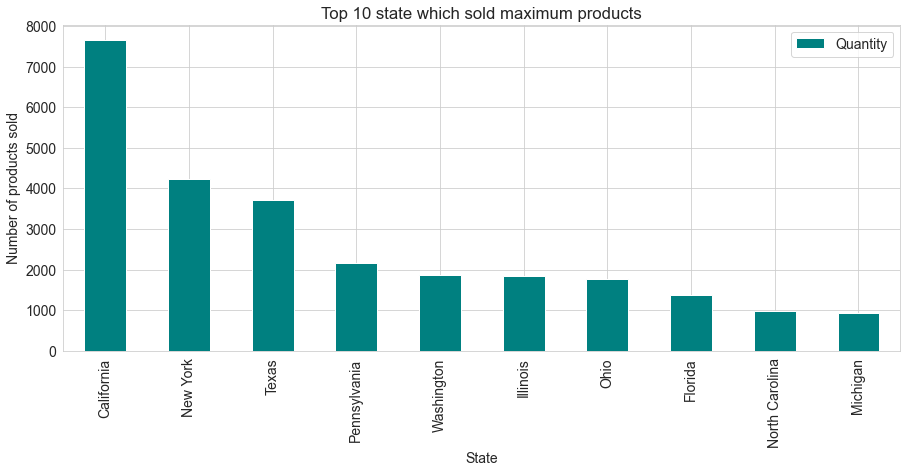

In [22]:
# Now plot the graph for top 10 state which sold maximum products.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
df5.head(10).plot(kind='bar', x= "State", y= "Quantity", color= 'teal');
plt.title("Top 10 state which sold maximum products");
plt.ylabel("Number of products sold");

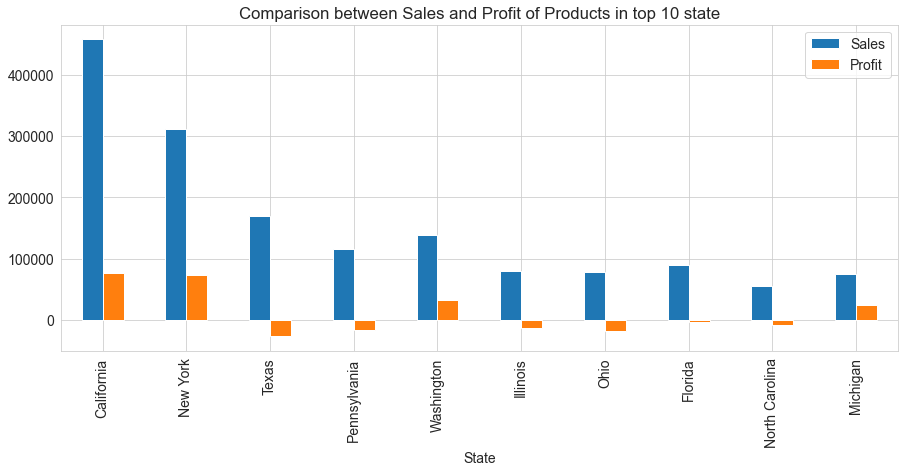

In [23]:
# Ploting the graph for each state to know how much profit they made in comparison to sale.

df6= df5[["State", "Sales", "Profit"]]
df6.set_index("State", inplace= True)

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
df6.head(10).plot(kind='bar');
plt.title("Comparison between Sales and Profit of Products in top 10 state");

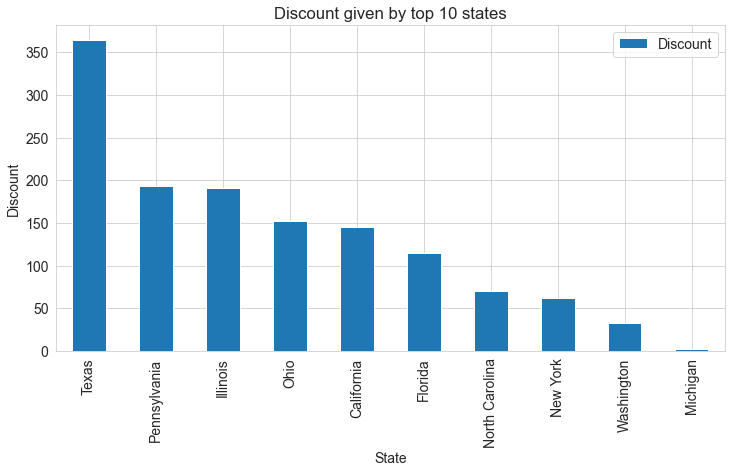

In [36]:
# ploting the graph for maximum discount given by top 10 states.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (12,6)
df5.head(10).sort_values("Discount", ascending = False).plot(kind='bar', x= "State", y= "Discount");
plt.title("Discount given by top 10 states");
plt.ylabel("Discount");

# Conclusion

* Office supllies sold in maximum quantity in each region of United States specifically Binders and Papers.
* Maximum Sales are produced by Technical Products in every region.
* California is the Top state which made maximum sale but it's profit is approximately same as New york.
* 6 out of top 10 states made negative Profit i.e Loss due to maximum discount given by them.
* The product which made maximum profit is Copier followed by Phones ans Accessories.




# Suggestions

* The sates which made loss should decrease their discount amount.
* Technology and offfice supplies are two popular domain so we can focus more on selling these products.




